In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
from pandas.io.json import json_normalize

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [91]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list and note the latitude
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)



605

In [92]:
print(cities)

['rikitea', 'geraldton', 'vila velha', 'bairiki', 'codrington', 'bambous virieux', 'kloulklubed', 'kodiak', 'bandarbeyla', 'clyde river', 'busselton', 'vaini', 'petropavlovsk-kamchatskiy', 'bam', 'vestmannaeyjar', 'ocos', 'hithadhoo', 'artyk', 'tommot', 'lasa', 'guane', 'albany', 'husavik', 'saleaula', 'atuona', 'mpanda', 'guerrero negro', 'toliary', 'bluff', 'mungwi', 'newport', 'high prairie', 'souillac', 'kapaa', 'saint-philippe', 'ushuaia', 'barrow', 'robertson', 'sitka', 'olafsvik', 'eyl', 'yairipok', 'mar del plata', 'abha', 'castro', 'tuktoyaktuk', 'shambu', 'port hedland', 'georgetown', 'santiago', 'brunsbuttel', 'pevek', 'alofi', 'cabo san lucas', 'carnarvon', 'onalaska', 'maiduguri', 'awjilah', 'varhaug', 'katsuura', 'punta arenas', 'chokurdakh', 'hasaki', 'butaritari', 'taolanaro', 'saskatoon', 'ritchie', 'khatanga', 'barawe', 'hobart', 'najran', 'rochester', 'hilo', 'mecca', 'sembabule', 'bengkulu', 'okha', 'upernavik', 'egvekinot', 'provideniya', 'srednekolymsk', 'norman w

In [93]:
#get the temperatures for all cities

#cities = ['castro', 'ushuaia', 'ancud', 'evensk', 'panzhihua', 'punta arenas', 'bredasdorp', 'kuching', 'neiafu', 'tukrah', 'westport', 'hue', 'ngukurr', 'taolanaro', 'bathsheba', 'atar', 'bari', 'marsabit', 'qaanaaq', 'dikson', 'busselton', 'albany', 'taoudenni', 'fairbanks', 
          #'bluff', 'nikolskoye', 'pemangkat', 'hermanus', 'rikitea', 'georgetown', 'fortuna', 'yellowknife', 'knysna']
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

lat =[]
city_temps = []
perc_humidity = []
perc_cloudiness = []
wind_speed = []
for city in cities:
 
       
    # Build query URL
    query_url = f'{url}appid={weather_api_key}&q={city}&units=imperial'
    
    
    
    # Get weather data
    weather_response = requests.get(query_url)   
    weather_json = weather_response.json()
    
# #pprint(weather_json)

    #make a list of all city lats
    try:
        lat.append(weather_json['coord']['lat'])
    except:
        lat.append(0)
        
    

    #get temperature for each city
    try:
        city_temp = weather_json['main']['temp']
        city_temps.append(city_temp)
    except:
        city_temps.append(0)
        
        
    #get % humidity for each city        
    try:
        humidity = weather_json['main']['humidity']
        perc_humidity.append(humidity)
    except:
        perc_humidity.append(0)
        
        
#     # get % cloudiness for each city
    try:
        cloudiness = weather_json['clouds']['all']
        perc_cloudiness.append(cloudiness)
    except:
        perc_cloudiness.append(0)
        
        
#     #get wind speed for each city
    try:
        windiness = weather_json['wind']['speed']
        wind_speed.append(windiness)
    except:
        wind_speed.append(0)
    
#     with open(cities.csv, 'w') as csv_file:
#         csv_file.write(city)

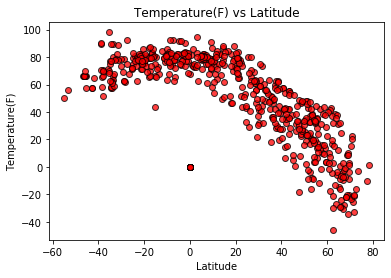

<Figure size 432x288 with 0 Axes>

In [95]:
# build a scatter plot of Temperature(F) vs Latitude
x_values = lat
y_vaules = city_temps
plt.scatter(lat, city_temps, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("Temperature(F) vs Latitude")
plt.show()
plt.savefig('TempvLat.png')

In [ ]:
# The temperature vs latitude plot shows that in the northern hemispheres,as the distance from the equator increases, 
#the cities have colder temperatures.
#In the southern hemisphere, as distance from the equator increases, the cities generally have warmer temperatures.

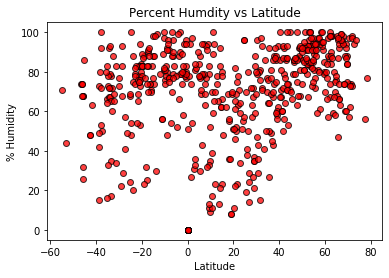

<Figure size 432x288 with 0 Axes>

In [96]:
# build a scatter plot of % humidity vs Latitude
x_values = lat
y_vaules = perc_humidity
plt.scatter(lat, perc_humidity, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("Percent Humdity vs Latitude")
plt.show()
plt.savefig('HumidityvLat.png')

In [ ]:
#In the northern hemisphere, the % humidity generally increases as latitude increases.
#In the southern hemisphere, the % humidity generally increases as distance from the equator increases.

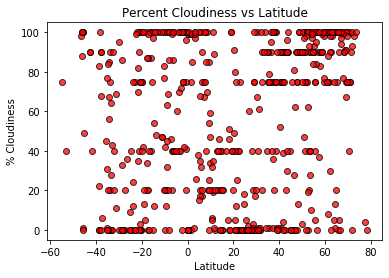

<Figure size 432x288 with 0 Axes>

In [97]:
# build a scatter plot of % cloudiness vs Latitude
x_values = lat
y_vaules = perc_cloudiness
plt.scatter(lat, perc_cloudiness, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Percent Cloudiness vs Latitude")
plt.show()
plt.savefig('CloudsvLat.png')

In [ ]:
#There is no clear pattern between the latitude of a city and the percent cloudiness.

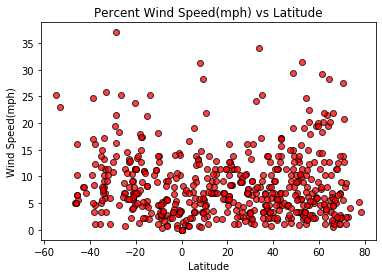

<Figure size 432x288 with 0 Axes>

In [98]:
# build a scatter plot of Wind Speed vs Latitude
x_values = lat
y_vaules = wind_speed
plt.scatter(lat, wind_speed, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Percent Wind Speed(mph) vs Latitude")
plt.show()
plt.savefig('WindvLat.png')

In [ ]:
#Most cities experience wind speeds below 20 mph regardless of latitude.

In [ ]:
#make ddfs of lat and other qualities

lat_and_temp = pd.DataFrame('lat': lat, city_temps)
indexed = lat_and_temp.reset_index()
indexed.columns = ['city_temps', 'lat']
indexed
#make bins for 0-100 and -1 - -100
# lat_and_humidity= dict(zip(lat, perc_humidity))
# lat_and_cloudiness= dict(zip(lat, perc_cloudiness))
# lat_and_wind_speed= dict(zip(lat, wind_speed))

In [ ]:
#create function to convert data into a datframe
def convert_to_df (df_name, y_axis):
    df_name = pd.DataFrame(lat, y_axis)
    df_name = df_name.reset_index()
    df_name.columns = ['y_axis', 'lat']
    
    return df_name


#create a function to bin latitudes into northern and southern hemispheres
def lat_bins (dataframe_name):
    
    bins = [-101, 0, 100]
    labels = ['Southern Hemisphere', 'Northern Hemisphere']

    #categorize the latitudes by bins
    pd.cut(dataframe_name['lat'], bins, labels=labels).head()

    # Place the data series into a new column inside of the DataFrame
    dataframe_name["Hemisphere"] = pd.cut(dataframe_name["lat"], bins, labels=labels)
    
    
    return dataframe_name


#create a function to build a scatterplot and plot linear regression

In [ ]:
#convert all data to dataframes
#humidity
humidity = pd.DataFrame('lat', 'perc_humidity')
humidity = humidity.reset_index()
humidity.columns = ['perc_humidity', 'lat']

#cloudiness
cloudiness = pd.DataFrame(lat, perc_cloudiness)
cloudiness = cloudiness.reset_index()
cloudiness.columns = ['perc_cloudiness', 'lat']

#wind speed
windiness = pd.DataFrame(lat, wind_speed)
windiness = cloudiness.reset_index()
windiness.columns = ['wind_speed', 'lat']


In [ ]:
#convert_to_df (lat_and_humidity, perc_humidity)


In [ ]:
# def lin_reg(df_name, xaxis, yaxis):
#     # Add the linear regression equation and line to plot
#     x_values = df_name['xaxis']
#     y_values = df_name['yaxis']
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#     plt.xlabel(xaxis.title())
#     plt.ylabel(yaxis.title())
    
#     return plt.show()

# lin_reg(indexed, lat, city_temps)

In [ ]:
#create a column for northern and southern hemisphere
bins = [-101, 0, 100]
labels = ['Southern Hemisphere', 'Northern Hemisphere']

    #categorize the latitudes by bins
pd.cut(indexed['lat'], bins, labels=labels).head()

    # Place the data series into a new column inside of the DataFrame
indexed["Hemisphere"] = pd.cut(indexed["lat"], bins, labels=labels)

indexed

#create a table with southern or northern hemisphere
hemispheres = indexed.groupby('Hemisphere').head()
hemispheres.reset_index(level =0, inplace = True)

# isolate northern hemisphere data
northern =hemispheres[hemispheres['Hemisphere'] == "Northern Hemisphere"]
southern =hemispheres[hemispheres['Hemisphere']=="Southern Hemisphere"]


In [ ]:
# Northern hemisphere Temperature (F) vs. Latitude

# Add the linear regression equation and line to plot
x_values = northern['lat']
y_values = northern['city_temps']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(0,100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Temperature(F) vs Latitude In The Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")   
plt.show()


In [ ]:
#Southern Hemisphere - Temperature (F) vs. Latitude
# Add the linear regression equation and line to plot
x_values = southern['lat']
y_values = southern['city_temps']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(-100,0)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Temperature(F) vs Latitude In The Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")   
plt.show()


In [ ]:
# Northern hemisphere Humidity (%) vs. Latitude
# build a scatter plot of % humidity vs Latitude
x_values = northern
y_vaules = perc_humidity
plt.scatter(lat, perc_humidity, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("Percent Humdity vs Latitude")
plt.show()


In [ ]:
#Southern Hemisphere - Humidity (%) vs. Latitude
# build a scatter plot of % humidity vs Latitude
x_values = southern
y_vaules = perc_humidity
plt.scatter(lat, perc_humidity, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("Percent Humdity vs Latitude")
plt.show()


In [ ]:
 #Northern Hemisphere - Cloudiness (%) vs. Latitude
    # build a scatter plot of % cloudiness vs Latitude
x_values = northern
y_vaules = perc_cloudiness
plt.scatter(lat, perc_cloudiness, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Percent Cloudiness vs Latitude")
plt.show()

In [ ]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
# build a scatter plot of % cloudiness vs Latitude
x_values = southern
y_vaules = perc_cloudiness
plt.scatter(lat, perc_cloudiness, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Percent Cloudiness vs Latitude")
plt.show()

In [ ]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = northern
y_vaules = wind_speed
plt.scatter(lat, wind_speed, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Percent Wind Speed(mph) vs Latitude")
plt.show()

In [ ]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = southern
y_vaules = wind_speed
plt.scatter(lat, wind_speed, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Percent Wind Speed(mph) vs Latitude")
plt.show()